In [134]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 
from sklearn import tree
import numpy as np
import seaborn as sns
import sklearn.model_selection
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier

My project is over the healthdataset that is focusing on strokes I got this data set from kaggle :https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. in this proejct I will link the impacts of work stress as shown as "work_type" to indicate what could be the leading cause of strokes in this data set.

In [114]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

missing_data = df.isnull().sum()
df.dropna(inplace=True)


df.drop_duplicates(inplace=True)


print("Missing Data:")
print(missing_data)


print("DataFrame Info:")
print(df.info())

Missing Data:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi              

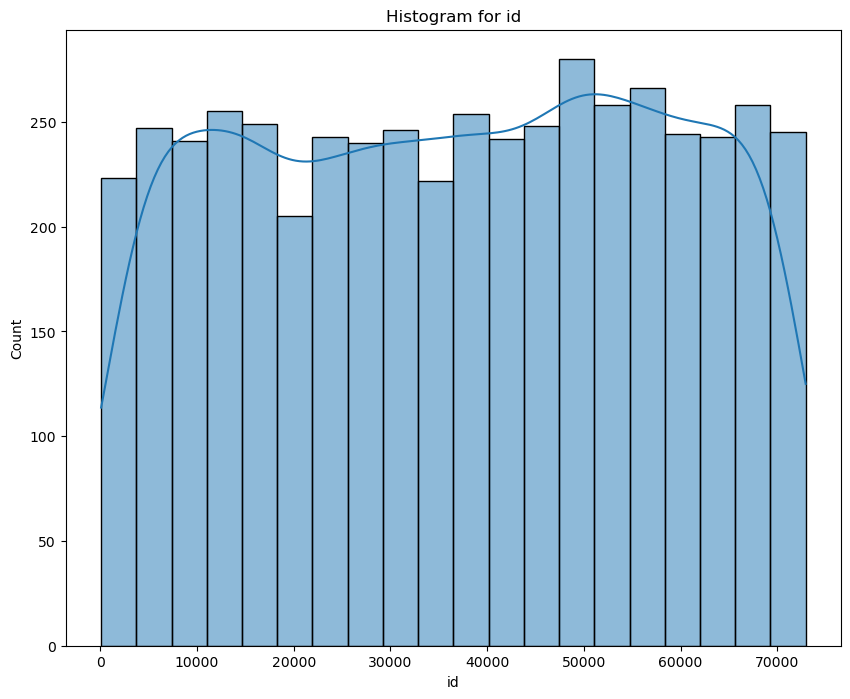

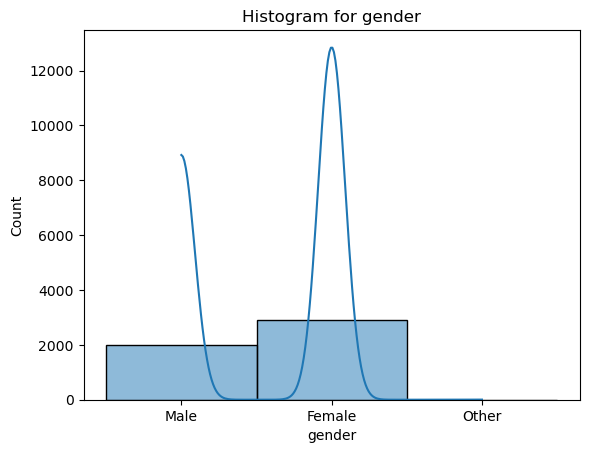

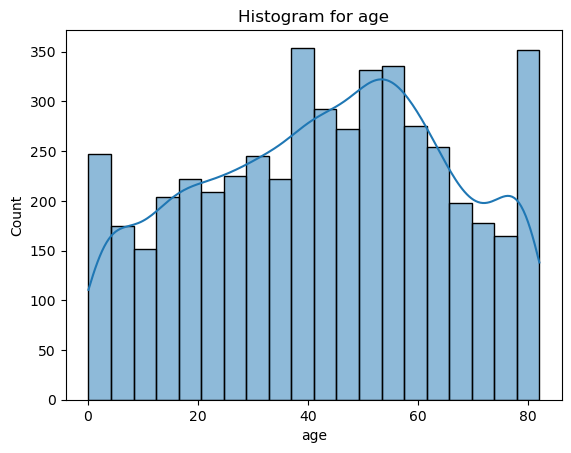

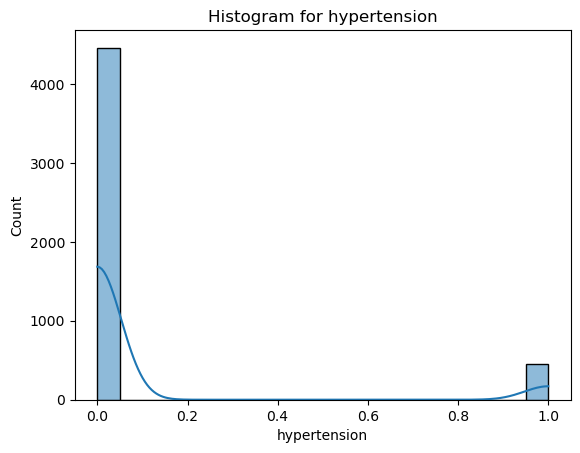

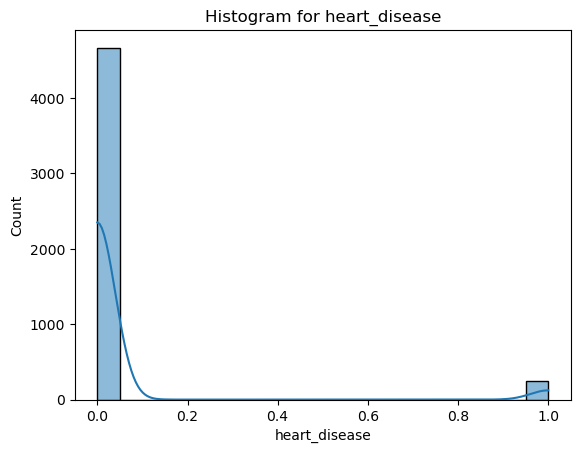

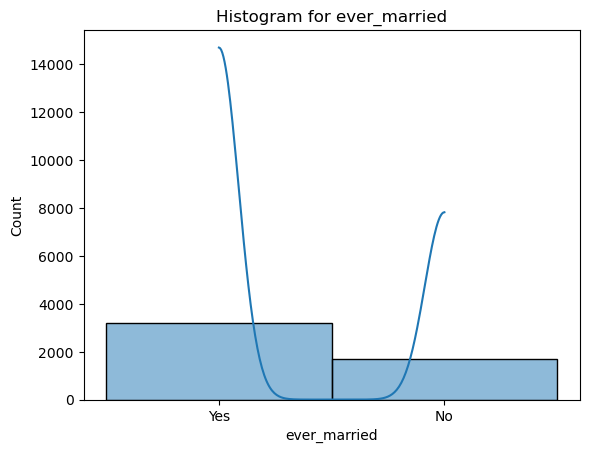

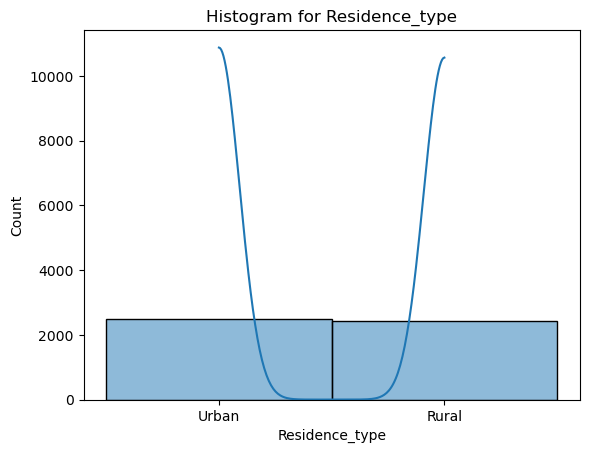

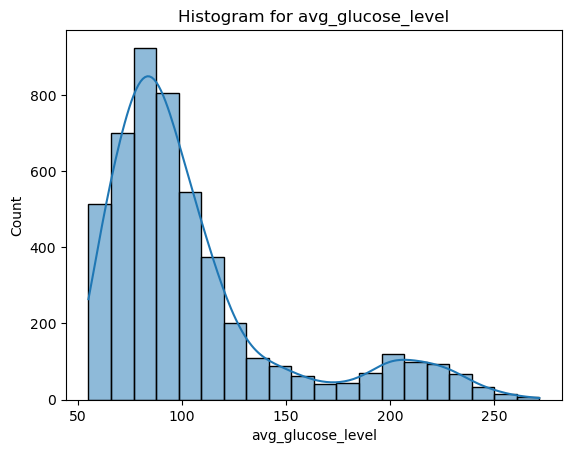

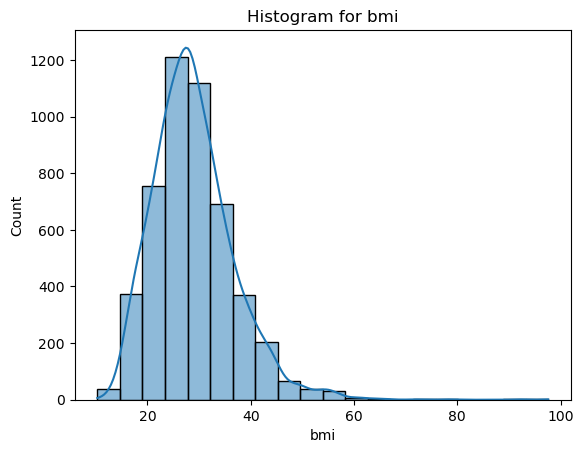

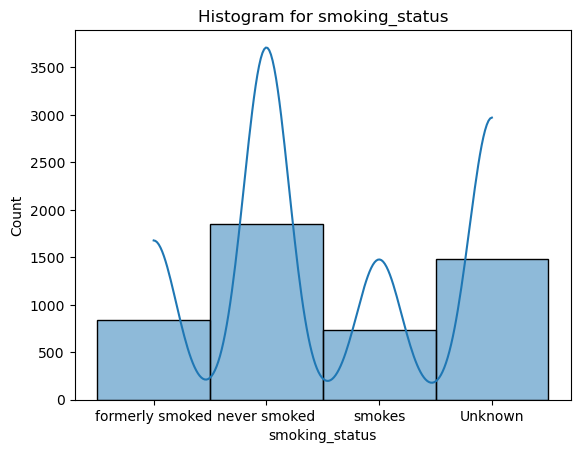

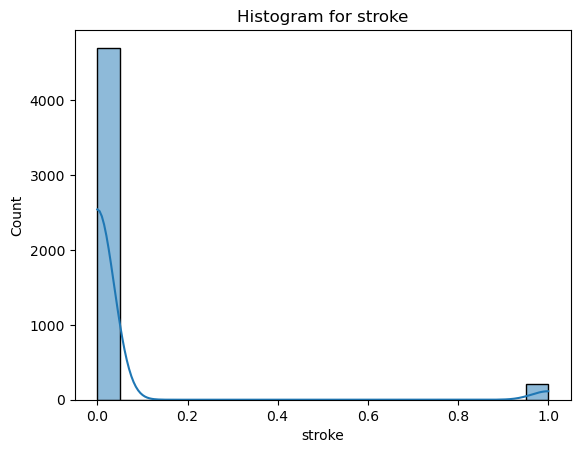

In [132]:
numeric_variables = [col for col in df.columns if col != 'work_type']


plt.figure(figsize=(10, 8))
for variable in numeric_variables:
    sns.histplot(data=df, x=variable, bins=20, kde=True)
    plt.title(f'Histogram for {variable}')
    plt.show()


In [131]:
categorical_features = ['age', 'smoking_status', 'work_type']
target_variable = 'work_type'

features_to_drop = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    alpha = 0.05 
    
    if p < alpha:
        print(f'{feature} is dependent on {target_variable} (p-value={p}), keeping it.')
    else:
        print(f'{feature} is independent of {target_variable} (p-value={p}), dropping it.')
        features_to_drop.append(feature)

df.drop(features_to_drop, axis=1, inplace=True)


print(df.head())

age is dependent on work_type (p-value=0.0), keeping it.
smoking_status is dependent on work_type (p-value=1.7114132926070036e-283), keeping it.
work_type is dependent on work_type (p-value=0.0), keeping it.
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked  

In [125]:
threshold = 0.01
numeric_columns = df.select_dtypes(include=['number']).columns
X = df.drop(columns=['work_type'])  


selector = VarianceThreshold(threshold)
selector.fit(X[numeric_columns])


low_variance_mask = selector.get_support()
low_variance_features = X[numeric_columns].columns[~low_variance_mask]


X_high_variance = X[numeric_columns].loc[:, low_variance_mask]
print("Remaining High-Variance Features:")
print(X_high_variance.columns)


print("Low-Variance Features:")
print(low_variance_features)

Remaining High-Variance Features:
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')
Low-Variance Features:
Index([], dtype='object')


In [118]:
X = df.drop(target_variable, axis=1)
X = pd.get_dummies(X)

y = df['work_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)


model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.5483706720977597


In [133]:
class_distribution = df['work_type'].value_counts()
print("Class Distribution:\n", class_distribution)


X = pd.get_dummies(df.drop(columns=['work_type']))
y = df['work_type']



random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf, zero_division=1)

print("Random Forest Model Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)


Class Distribution:
 Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Random Forest Model Accuracy: 0.6838085539714868
Random Forest Classification Report:
                precision    recall  f1-score   support

     Govt_job       0.22      0.03      0.05       250
 Never_worked       1.00      0.00      0.00         8
      Private       0.67      0.93      0.78      1130
Self-employed       0.36      0.10      0.16       316
     children       0.90      0.98      0.94       260

     accuracy                           0.68      1964
    macro avg       0.63      0.41      0.39      1964
 weighted avg       0.60      0.68      0.61      1964



I beleive my model has passed beacuse it is almost at 0.6834 accuracy which is queit high bit of data that is classified.
i used random sampler because i belived it would greatly and easily inprove my data.
